In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

In [16]:
df  = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
df.Age.unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

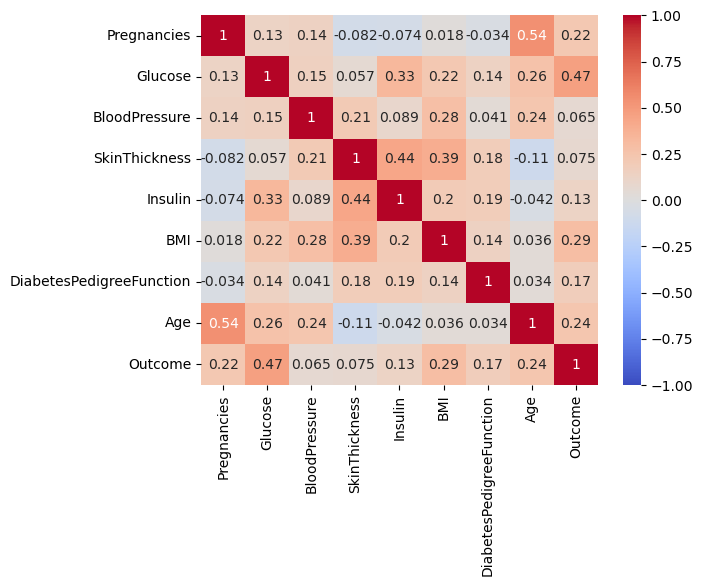

In [ ]:
c = df.corr()
sns.heatmap(c,annot=True,cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['Glucose','BMI','Glucose','Insulin','SkinThickness','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

In [23]:
sc = StandardScaler()
data = sc.fit_transform(X)
change = pd.DataFrame(data)
data

array([[ 0.84832379,  0.20401277,  0.84832379, ...,  0.90726993,
         0.46849198,  1.4259954 ],
       [-1.12339636, -0.68442195, -1.12339636, ...,  0.53090156,
        -0.36506078, -0.19067191],
       [ 1.94372388, -1.10325546,  1.94372388, ..., -1.28821221,
         0.60439732, -0.10558415],
       ...,
       [ 0.00330087, -0.73518964,  0.00330087, ...,  0.15453319,
        -0.68519336, -0.27575966],
       [ 0.1597866 , -0.24020459,  0.1597866 , ..., -1.28821221,
        -0.37110101,  1.17073215],
       [-0.8730192 , -0.20212881, -0.8730192 , ...,  0.65635768,
        -0.47378505, -0.87137393]])

In [24]:
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.2,random_state=42)

In [25]:
model = LogisticRegression(solver="saga",max_iter=100)
model.fit(X_train,y_train)

LogisticRegression(solver='saga')

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predict on a test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

Accuracy: 0.766
Precision: 0.679
Recall: 0.655


In [ ]:
from skle